In [3]:
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.regularizers import l2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [ ]:
import keras

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
from sklearn.model_selection import cross_val_score

import abc
import numpy as np

import pandas as pd
import abc
import re
import nltk
from sklearn import model_selection 
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [ ]:

import time
import numpy as np

import datetime
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA

import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

import xgboost as xgb
from sklearn.metrics import accuracy_score

In [ ]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Bidirectional , GRU , RepeatVector
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
import pandas
from keras.models import load_model
from os.path import isfile
import os
from keras.optimizers import Adam
import pickle

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [32]:
import pandas as pd
import numpy as np
from dateutil.parser import parse
import datetime
import pylab as plt
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
#UTIL functions

In [5]:
def getStartEndDateShape(dfz):
    print('---------------------------')   
    print('shape', dfz.shape) 
    try:
        startDate = str(min(dfz['date']))
        endDate = str(max(dfz['date']))
        print('startDate', startDate)
        print('endDate', endDate)

    except:
        print("No Date column")

In [6]:
def getFeaturesAndTargetRemoveDate(_df):
    try:
        train_y = _df['target']
        train = _df.drop(['date','target'],axis =1)
    except:
        train_y = _df['Target']
        train = _df.drop(['date','Target'],axis =1)        
    return train, train_y

In [7]:
def prepareDataSet(_df):
    _df.date = pd.to_datetime(_df.date)
    train = _df[_df['date'] < pd.to_datetime('2019/01/01')]
    test = _df[_df['date'] >= pd.to_datetime('2019/01/01')]
    
    train, train_y = getFeaturesAndTargetRemoveDate(train)
    test, test_y = getFeaturesAndTargetRemoveDate(test)
    return train, train_y,test, test_y

In [8]:
def createComparableDataset(_df):
    _df.date = pd.to_datetime(_df.date)
    _df = _df[_df['date'] >= pd.to_datetime('2015/05/04')]
    _df = _df[_df['date'] <= pd.to_datetime('2019/03/28')]
    return _df

In [9]:
featureDF_nw = pd.read_csv('nw_feature_woText_MSFT.csv')
featureDF_tw = pd.read_csv('tw_feature_woText_MSFT.csv')
featureFI = pd.read_csv('FIwithTargetwithFTT.csv')
bert_featureDF_nw = pd.read_csv('nw_BertVector.csv')
bert_featureDF_tw = pd.read_csv('tw_BertVector_MSFT.csv')

In [10]:
nw_date = featureDF_nw.date.values.tolist()
tw_date = featureDF_tw.date.values.tolist()

In [11]:
bert_featureDF_nw['date'] = nw_date
bert_featureDF_tw['date'] = tw_date

In [12]:
targetAndDateDF = featureFI[['date','Target']]

In [13]:
bert_featureDF_nw.shape

(4020, 769)

In [14]:
#news dataset

In [15]:
result_nw =pd.merge( targetAndDateDF,bert_featureDF_nw, how='right', on='date')
getStartEndDateShape(result_nw)

---------------------------
shape (4020, 770)
startDate 2004/07/21
endDate 2019/03/28


In [16]:
result_nw.sort_values(by='date',inplace=True) 
cols = ['Target']
result_nw[cols] = result_nw[cols].ffill()
result_nw.fillna(0,inplace=True)

In [17]:
#twitter dataset

In [18]:
result_tw =pd.merge( targetAndDateDF,bert_featureDF_tw, how='right', on='date')
getStartEndDateShape(result_tw)

---------------------------
shape (1426, 770)
startDate 2015/05/04
endDate 2019/04/04


In [19]:
result_tw.sort_values(by='date',inplace=True) 
cols = ['Target']
result_tw[cols] = result_tw[cols].ffill()
result_tw.fillna(0,inplace=True)

In [20]:
#combine news and twitter dataset

In [21]:
result_ntw =pd.merge( result_tw.drop(['Target'], axis=1),result_nw.drop(['Target'], axis=1), how='outer', on='date')
getStartEndDateShape(result_ntw)

---------------------------
shape (4423, 1537)
startDate 2004/07/21
endDate 2019/04/04


In [22]:
result_ntw =pd.merge( targetAndDateDF,result_ntw, how='right', on='date')
getStartEndDateShape(result_ntw)

---------------------------
shape (4423, 1538)
startDate 2004/07/21
endDate 2019/04/04


In [23]:
result_ntw.sort_values(by='date',inplace=True) 
cols = ['Target']
result_ntw[cols] = result_ntw[cols].ffill()
result_ntw.fillna(0,inplace=True)

In [28]:
#ML models 

In [30]:
# Naive Bayes for Baseline
from sklearn.naive_bayes import GaussianNB
def NaiveBayes(train_features , train_labels, test_features,test_labels):
    gnb = GaussianNB()
    y_pred = gnb.fit(train_features, train_labels).predict(test_features)
    print('accuracy_score',accuracy_score(y_pred, test_labels))
    print('classification_score\n',classification_report(y_pred, test_labels))
    

In [30]:
def cCMatrixAccRF(train_features , train_labels, test_features,test_labels, features, dispImpOfFeature = True):
#         train_features, test_features, train_labels, test_labels= model_selection.train_test_split( featureDF , targetValue, test_size=0.1, random_state=0)

        rf_model =RandomForestClassifier(n_estimators=5000, max_depth=4,random_state=0)
        rf_model.fit(train_features, train_labels)
        y_predicted=rf_model.predict(test_features)
        print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++' )
        
        print('confusion_matrix',confusion_matrix(y_true=test_labels, y_pred=y_predicted))
        print('number of datapoints in Up Class', test_labels.value_counts()[1])
        print('number of datapoints in Down Class', test_labels.value_counts()[0])
        print('accuracy_score',accuracy_score(y_predicted, test_labels))
        print('classification_score\n',classification_report(y_predicted, test_labels))
        print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
#         return rf_model.predict(train_features),rf_model.predict(test_features)

In [31]:
def cCMatrixAccAdaboost(train_features , train_labels, test_features,test_labels):
#         train_features, test_features, train_labels, test_labels= model_selection.train_test_split( featureDF , targetValue, test_size=0.1, random_state=0)

        abc_model =AdaBoostClassifier(n_estimators=5000, random_state=0)
        abc_model.fit(train_features, train_labels)
        y_predicted=abc_model.predict(test_features)
        print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++' )
        
        print('confusion_matrix',confusion_matrix(y_true=test_labels, y_pred=y_predicted))
        print('number of datapoints in Up Class', test_labels.value_counts()[1])
        print('number of datapoints in Down Class', test_labels.value_counts()[0])
        print('accuracy_score',accuracy_score(y_predicted, test_labels))
        print('classification_score\n',classification_report(y_predicted, test_labels))
        print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

In [32]:
def cCMatrixAccGradientTreeBosting(train_features , train_labels, test_features,test_labels):
#         train_features, test_features, train_labels, test_labels= model_selection.train_test_split( featureDF , targetValue, test_size=0.1, random_state=0)

        gbc_model =GradientBoostingClassifier(n_estimators=5000, learning_rate=1.0, max_depth=4,random_state=0)
        gbc_model.fit(train_features, train_labels)
        y_predicted=gbc_model.predict(test_features)
        print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++' )
        
        print('confusion_matrix',confusion_matrix(y_true=test_labels, y_pred=y_predicted))
        print('number of datapoints in Up Class', test_labels.value_counts()[1])
        print('number of datapoints in Down Class', test_labels.value_counts()[0])
        print('accuracy_score',accuracy_score(y_predicted, test_labels))
        print('classification_score\n',classification_report(y_predicted, test_labels))
        print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

In [33]:
def cCMatrixAccXGB(X_train , y_train, X_test,y_test):
    
    regressor = xgb.XGBRegressor(gamma=0.0,n_estimators=150,base_score=0.7,colsample_bytree=1,learning_rate=0.01)

    xgbModel = regressor.fit(X_train,y_train)

    y_predicted = xgbModel.predict(X_test)
    y_predicted_binary = [1 if yp >=0.5 else 0 for yp in y_predicted] # (y_predicted > 0.5)

    print ('Model accuracy = %.3f' % accuracy_score(y_test,y_predicted_binary))

    print('classification_score\n',classification_report(y_test, y_predicted_binary))
#     return y_predicted_binary

In [34]:
def cCMatrixAccVotingClasifier(train_features , train_labels, test_features,test_labels):

        rf_model =RandomForestClassifier(n_estimators=5000, max_depth=4,random_state=0)
        abc_model =AdaBoostClassifier(n_estimators=5000, random_state=0)
        gbc_model =GradientBoostingClassifier(n_estimators=5000, learning_rate=1.0, max_depth=4,random_state=0)
        lr_model = LogisticRegression(solver='lbfgs', multi_class='ovr',random_state=1)
        gnb_model = GaussianNB()
        
        eclf = VotingClassifier(estimators=[('lr', lr_model), ('rf', rf_model), ('gnb', gnb_model), ('abc', abc_model), ('gbc', gbc_model)], voting='soft')
        scores = cross_val_score(eclf, train_features, train_labels, cv=5, scoring='accuracy')
        print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), 'Ensemble'))
#         for clf, label in zip([lr_model, rf_model, gnb_model,abc_model,gbc_model, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'AdaBoostClassifier','GradientBoostingClassifier','Ensemble']):
#             scores = cross_val_score(clf, train_features, train_labels, cv=5, scoring='accuracy')
#             print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

In [35]:
#DL models 

In [36]:
n_epoch=200

In [37]:
def DenseNetwork(featureLength):
    #defifne a sequentail Model
    model = Sequential()

    #Hidden Layer-1
    model.add(Dense(100,activation='relu',input_dim=featureLength,kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3, noise_shape=None, seed=None))

    #Hidden Layer-2
    model.add(Dense(100,activation = 'relu',kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3, noise_shape=None, seed=None))

    #Output layer
    model.add(Dense(1,activation='sigmoid'))
    model.summary()
    return model

In [38]:
def CNN_LSTMNetwork(inpuFeatures):
    #defifne a sequentail Model
    model = Sequential()

    #Hidden Layer-1
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu',input_shape=(inpuFeatures, 1)))
    #Hidden Layer-2
    model.add(MaxPooling1D(pool_size=2))
    #Hidden Layer-3
    model.add(LSTM(100))

    #Output layer
    model.add(Dense(1,activation='sigmoid'))
    model.summary()
    return model

In [39]:
def RNNNetwork(inpuFeatures):
    #defifne a sequentail Model
    model = Sequential()

    #Hidden Layer-1
    model.add(keras.layers.SimpleRNN(100, activation='tanh', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False))
    
    #Hidden Layer-2
    model.add(RepeatVector(1))
    
    #Hidden Layer-3
    model.add(keras.layers.SimpleRNN(100, return_sequences=True))

    #Output layer
    model.add(keras.layers.TimeDistributed(Dense(1,activation='sigmoid')))
#     model.summary()
    return model

In [40]:
def CNN_RNNNetwork(inpuFeatures):
    #defifne a sequentail Model
    model = Sequential()

    #Hidden Layer-1
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu',input_shape=(inpuFeatures, 1)))
    #Hidden Layer-2
    model.add(MaxPooling1D(pool_size=2))
    #Hidden Layer-3
    model.add(keras.layers.SimpleRNN(100, activation='tanh', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False))

    #Output layer
    model.add(Dense(1,activation='sigmoid'))
    model.summary()
    return model

In [41]:
def CNN_GRUNetwork(inpuFeatures):
    #defifne a sequentail Model
    model = Sequential()

    #Hidden Layer-1
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu',input_shape=(inpuFeatures, 1)))
    #Hidden Layer-2
    model.add(MaxPooling1D(pool_size=2))
    #Hidden Layer-3
    model.add(GRU(100))

    #Output layer
    model.add(Dense(1,activation='sigmoid'))
    model.summary()
    return model

In [42]:
def CNN_BideirectionalLSTMNetwork(inpuFeatures):
    #defifne a sequentail Model
    model = Sequential()

    #Hidden Layer-1
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu',input_shape=(inpuFeatures, 1)))
    #Hidden Layer-2
    model.add(MaxPooling1D(pool_size=2))
    #Hidden Layer-3
    model.add(Bidirectional(LSTM(100)))

    #Output layer
    model.add(Dense(1,activation='sigmoid'))
    model.summary()
    return model

In [43]:
def evaluateModelAndTestAccuracy(model,trainX, trainY, testX, testY,n_epoch):
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(trainX, trainY, epochs=n_epoch, validation_split=0.1,batch_size=256, verbose=1,)
    
    results = model.evaluate(testX, testY)
    
    y_pred = model.predict_classes(testX)
    print("Evaluation on test data: Loss - {0},  Acurracy - {1}".format(results[0],str(results[1]*100)))
    print('classification_score\n',classification_report(y_pred, testY))
    
    return history

In [44]:
def vizModelMetric(history,n_epoch):
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, n_epoch), history.history["loss"], label="train_loss")
    plt.plot(np.arange(0, n_epoch), history.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, n_epoch), history.history["acc"], label="train_acc")
    plt.plot(np.arange(0, n_epoch), history.history["val_acc"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()

In [45]:
def NaivePredition(y_test):
    
    y_testCheck = y_test.copy()
    y_pred = list()
    
    for counter in range(len(y_testCheck)-1):
        y_pred.append(y_testCheck[counter])
    
    y_testCheck = y_testCheck[1:]
    print ('Model accuracy = %.3f' % accuracy_score(y_pred,y_testCheck))

    print('classification_score\n',classification_report(y_pred, y_testCheck))

# Building ML model -News

In [24]:
getStartEndDateShape(result_nw)

---------------------------
shape (4020, 770)
startDate 2004/07/21
endDate 2019/03/28


In [25]:
result_nw = createComparableDataset(result_nw)

In [27]:
getStartEndDateShape(result_nw)

---------------------------
shape (1027, 770)
startDate 2015-05-04 00:00:00
endDate 2019-03-28 00:00:00


In [28]:
train, train_y,test, test_y = prepareDataSet(result_nw)
print('train',train.shape,'test',test.shape,'train_y',len(train_y),'test_y',len(test_y))

train (961, 768) test (66, 768) train_y 961 test_y 66


In [33]:
NaiveBayes(train,train_y,test,test_y)

accuracy_score 0.5
classification_score
               precision    recall  f1-score   support

         0.0       0.41      0.43      0.42        28
         1.0       0.57      0.55      0.56        38

   micro avg       0.50      0.50      0.50        66
   macro avg       0.49      0.49      0.49        66
weighted avg       0.50      0.50      0.50        66



In [51]:
NaivePredition(list(test_y))

Model accuracy = 0.692
classification_score
               precision    recall  f1-score   support

         0.0       0.66      0.66      0.66        29
         1.0       0.72      0.72      0.72        36

   micro avg       0.69      0.69      0.69        65
   macro avg       0.69      0.69      0.69        65
weighted avg       0.69      0.69      0.69        65



In [52]:
features = list(train.columns)
cCMatrixAccRF(train , train_y, test,test_y, features)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
confusion_matrix [[ 3 26]
 [ 2 35]]
number of datapoints in Up Class 37
number of datapoints in Down Class 29
accuracy_score 0.5757575757575758
classification_score
               precision    recall  f1-score   support

         0.0       0.10      0.60      0.18         5
         1.0       0.95      0.57      0.71        61

   micro avg       0.58      0.58      0.58        66
   macro avg       0.52      0.59      0.45        66
weighted avg       0.88      0.58      0.67        66

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [53]:
cCMatrixAccAdaboost(train , train_y, test,test_y)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
confusion_matrix [[ 9 20]
 [11 26]]
number of datapoints in Up Class 37
number of datapoints in Down Class 29
accuracy_score 0.5303030303030303
classification_score
               precision    recall  f1-score   support

         0.0       0.31      0.45      0.37        20
         1.0       0.70      0.57      0.63        46

   micro avg       0.53      0.53      0.53        66
   macro avg       0.51      0.51      0.50        66
weighted avg       0.58      0.53      0.55        66

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [54]:
cCMatrixAccGradientTreeBosting(train , train_y, test,test_y)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
confusion_matrix [[12 17]
 [12 25]]
number of datapoints in Up Class 37
number of datapoints in Down Class 29
accuracy_score 0.5606060606060606
classification_score
               precision    recall  f1-score   support

         0.0       0.41      0.50      0.45        24
         1.0       0.68      0.60      0.63        42

   micro avg       0.56      0.56      0.56        66
   macro avg       0.54      0.55      0.54        66
weighted avg       0.58      0.56      0.57        66

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [55]:
cCMatrixAccVotingClasifier(train , train_y, test,test_y)

C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs 

Accuracy: 0.51 (+/- 0.01) [Ensemble]


In [56]:
cCMatrixAccXGB(train , train_y, test,test_y)

C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


Model accuracy = 0.576
classification_score
               precision    recall  f1-score   support

         0.0       0.67      0.07      0.12        29
         1.0       0.57      0.97      0.72        37

   micro avg       0.58      0.58      0.58        66
   macro avg       0.62      0.52      0.42        66
weighted avg       0.61      0.58      0.46        66



In [57]:
# Building DL model -NEWS
inputFeatures = train.shape[1]
n_epoch = 100

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               76900     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 87,101
Trainable params: 87,101
Non-trainable params: 0
_________________

Epoch 47/100
864/864 [==============================] - 0s 30us/step - loss: 0.6292 - acc: 0.7812 - val_loss: 0.9321 - val_acc: 0.5876
Epoch 48/100
864/864 [==============================] - 0s 31us/step - loss: 0.5835 - acc: 0.8380 - val_loss: 0.9518 - val_acc: 0.5464
Epoch 49/100
864/864 [==============================] - 0s 32us/step - loss: 0.5704 - acc: 0.8414 - val_loss: 1.0619 - val_acc: 0.4845
Epoch 50/100
864/864 [==============================] - 0s 30us/step - loss: 0.5656 - acc: 0.8426 - val_loss: 0.9958 - val_acc: 0.5567
Epoch 51/100
864/864 [==============================] - 0s 32us/step - loss: 0.5471 - acc: 0.8553 - val_loss: 0.9813 - val_acc: 0.5773
Epoch 52/100
864/864 [==============================] - 0s 33us/step - loss: 0.5366 - acc: 0.8762 - val_loss: 1.0067 - val_acc: 0.5464
Epoch 53/100
864/864 [==============================] - 0s 33us/step - loss: 0.5219 - acc: 0.8750 - val_loss: 1.0037 - val_acc: 0.5361
Epoch 54/100
864/864 [==============================] -

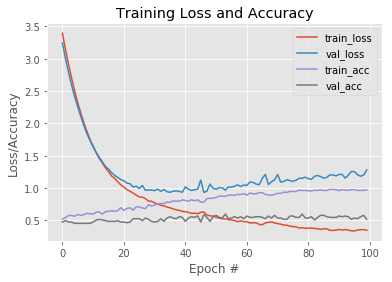

In [58]:
vizModelMetric(evaluateModelAndTestAccuracy(DenseNetwork(inputFeatures),train, train_y, test, test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 768, 32)           128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 384, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 53,429
Trainable params: 53,429
Non-trainable params: 0
_________________________________________________________________
Train on 864 samples, validate on 97 samples
Epoch 1/100
864/864 [==============================] - 5s 5ms/step - loss: 0.6903 - acc: 0.5556 - val_loss: 0.7063 - val_acc: 0.4742
Epoch 2/100
864/864 [==============================] - 3s 3ms/step - loss: 0.6873 - acc: 0.5

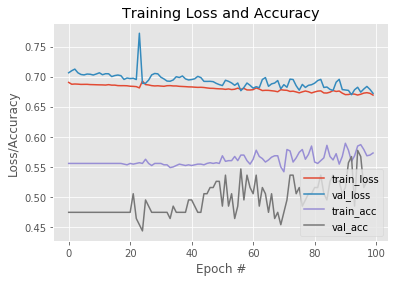

In [59]:
vizModelMetric(evaluateModelAndTestAccuracy(CNN_LSTMNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 768, 32)           128       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 384, 32)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               106400    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 201       
Total params: 106,729
Trainable params: 106,729
Non-trainable params: 0
_________________________________________________________________
Train on 864 samples, validate on 97 samples
Epoch 1/100
864/864 [==============================] - 6s 7ms/step - loss: 0.6908 - acc: 0.5162 - val_loss: 0.7084 - val_acc: 0.4742
Epoch 2/100
864/864 [==============================] - 4s 5ms/step - loss: 0.6874 - acc: 0

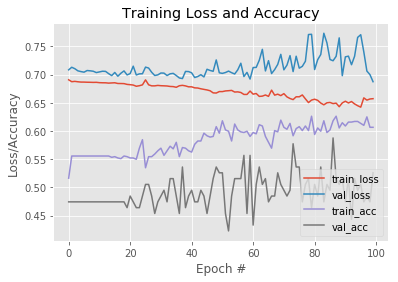

In [60]:
vizModelMetric(evaluateModelAndTestAccuracy(CNN_BideirectionalLSTMNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 768, 32)           128       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 384, 32)           0         
_________________________________________________________________
gru_1 (GRU)                  (None, 100)               39900     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 40,129
Trainable params: 40,129
Non-trainable params: 0
_________________________________________________________________
Train on 864 samples, validate on 97 samples
Epoch 1/100
864/864 [==============================] - 3s 4ms/step - loss: 0.6901 - acc: 0.5521 - val_loss: 0.7054 - val_acc: 0.4742
Epoch 2/100
864/864 [==============================] - 2s 3ms/step - loss: 0.6872 - acc: 0.5

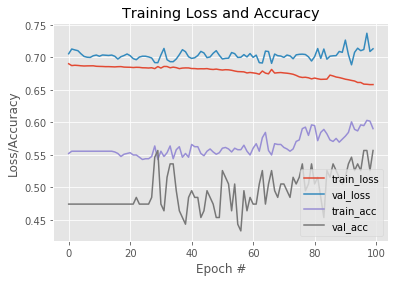

In [61]:
vizModelMetric(evaluateModelAndTestAccuracy(CNN_GRUNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 768, 32)           128       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 384, 32)           0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 100)               13300     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 13,529
Trainable params: 13,529
Non-trainable params: 0
_________________________________________________________________
Train on 864 samples, validate on 97 samples
Epoch 1/100
864/864 [==============================] - 2s 2ms/step - loss: 0.7000 - acc: 0.5324 - val_loss: 0.7010 - val_acc: 0.4536
Epoch 2/100
864/864 [==============================] - 1s 1ms/step - loss: 0.6907 - acc: 0.5

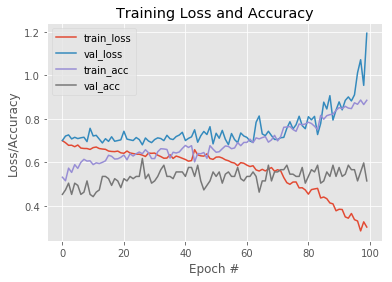

In [62]:
vizModelMetric(evaluateModelAndTestAccuracy(CNN_RNNNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

# Building ML model -Twitter

In [34]:
getStartEndDateShape(result_tw)

---------------------------
shape (1426, 770)
startDate 2015/05/04
endDate 2019/04/04


In [35]:
result_tw = createComparableDataset(result_tw)

In [36]:
getStartEndDateShape(result_tw)

---------------------------
shape (1419, 770)
startDate 2015-05-04 00:00:00
endDate 2019-03-28 00:00:00


In [37]:
train, train_y,test, test_y = prepareDataSet(result_tw)
print('train',train.shape,'test',test.shape,'train_y',len(train_y),'test_y',len(test_y))

train (1332, 768) test (87, 768) train_y 1332 test_y 87


In [38]:
NaiveBayes(train,train_y,test,test_y)

accuracy_score 0.45977011494252873
classification_score
               precision    recall  f1-score   support

         0.0       0.64      0.40      0.49        57
         1.0       0.33      0.57      0.42        30

   micro avg       0.46      0.46      0.46        87
   macro avg       0.49      0.49      0.46        87
weighted avg       0.53      0.46      0.47        87



In [68]:
NaivePredition(list(test_y))

Model accuracy = 0.756
classification_score
               precision    recall  f1-score   support

         0.0       0.71      0.69      0.70        36
         1.0       0.78      0.80      0.79        50

   micro avg       0.76      0.76      0.76        86
   macro avg       0.75      0.75      0.75        86
weighted avg       0.75      0.76      0.76        86



In [69]:
features = list(train.columns)
cCMatrixAccRF(train , train_y, test,test_y, features)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
confusion_matrix [[ 0 36]
 [ 0 51]]
number of datapoints in Up Class 51
number of datapoints in Down Class 36
accuracy_score 0.5862068965517241
classification_score
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.59      0.74        87

   micro avg       0.59      0.59      0.59        87
   macro avg       0.50      0.29      0.37        87
weighted avg       1.00      0.59      0.74        87

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [70]:
cCMatrixAccAdaboost(train , train_y, test,test_y)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
confusion_matrix [[21 15]
 [19 32]]
number of datapoints in Up Class 51
number of datapoints in Down Class 36
accuracy_score 0.6091954022988506
classification_score
               precision    recall  f1-score   support

         0.0       0.58      0.53      0.55        40
         1.0       0.63      0.68      0.65        47

   micro avg       0.61      0.61      0.61        87
   macro avg       0.61      0.60      0.60        87
weighted avg       0.61      0.61      0.61        87

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [71]:
cCMatrixAccGradientTreeBosting(train , train_y, test,test_y)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
confusion_matrix [[17 19]
 [17 34]]
number of datapoints in Up Class 51
number of datapoints in Down Class 36
accuracy_score 0.5862068965517241
classification_score
               precision    recall  f1-score   support

         0.0       0.47      0.50      0.49        34
         1.0       0.67      0.64      0.65        53

   micro avg       0.59      0.59      0.59        87
   macro avg       0.57      0.57      0.57        87
weighted avg       0.59      0.59      0.59        87

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [72]:
cCMatrixAccVotingClasifier(train , train_y, test,test_y)

C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs 

Accuracy: 0.49 (+/- 0.02) [Ensemble]


In [73]:
cCMatrixAccXGB(train , train_y, test,test_y)

C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


Model accuracy = 0.575
classification_score
               precision    recall  f1-score   support

         0.0       0.44      0.11      0.18        36
         1.0       0.59      0.90      0.71        51

   micro avg       0.57      0.57      0.57        87
   macro avg       0.52      0.51      0.45        87
weighted avg       0.53      0.57      0.49        87



In [74]:
# Building DL model -Twitter

In [75]:
featureLength = train.shape[1]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               76900     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 101       
Total params: 87,101
Trainable params: 87,101
Non-trainable params: 0
_________________________________________________________________
Train on 1198 samples, validate on 134 samples
Epoch 1/100
1198/1198 [==============================] - 1s 861us/step - loss: 3.3984 - acc

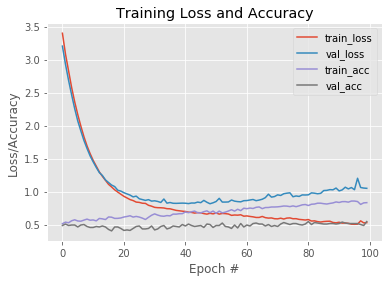

In [76]:
vizModelMetric(evaluateModelAndTestAccuracy(DenseNetwork(featureLength),train, train_y, test, test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 768, 32)           128       
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 384, 32)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 53,429
Trainable params: 53,429
Non-trainable params: 0
_________________________________________________________________
Train on 1198 samples, validate on 134 samples
Epoch 1/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.6911 - acc: 0.5192 - val_loss: 0.6984 - val_acc: 0.4925
Epoch 2/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.6883 - ac

C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


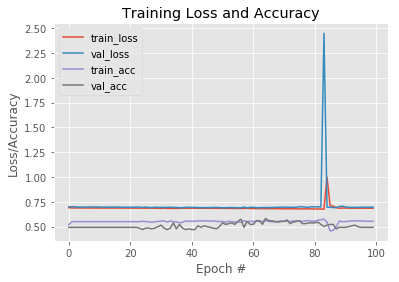

In [77]:
vizModelMetric(evaluateModelAndTestAccuracy(CNN_LSTMNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 768, 32)           128       
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 384, 32)           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 200)               106400    
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 201       
Total params: 106,729
Trainable params: 106,729
Non-trainable params: 0
_________________________________________________________________
Train on 1198 samples, validate on 134 samples
Epoch 1/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.6929 - acc: 0.5134 - val_loss: 0.7019 - val_acc: 0.4925
Epoch 2/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.6883 - 

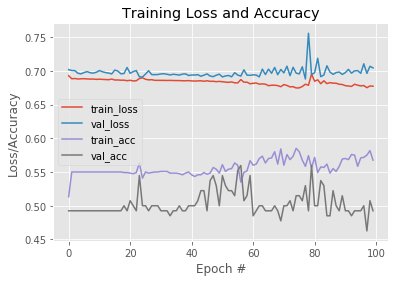

In [78]:
vizModelMetric(evaluateModelAndTestAccuracy(CNN_BideirectionalLSTMNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 768, 32)           128       
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 384, 32)           0         
_________________________________________________________________
gru_2 (GRU)                  (None, 100)               39900     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 101       
Total params: 40,129
Trainable params: 40,129
Non-trainable params: 0
_________________________________________________________________
Train on 1198 samples, validate on 134 samples
Epoch 1/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.6903 - acc: 0.5209 - val_loss: 0.6993 - val_acc: 0.4925
Epoch 2/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.6889 - ac

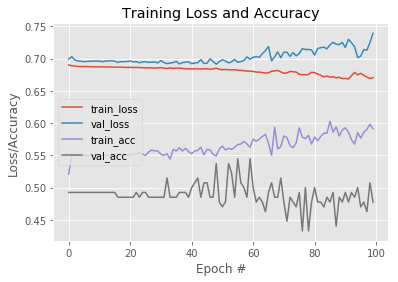

In [79]:
vizModelMetric(evaluateModelAndTestAccuracy(CNN_GRUNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 768, 32)           128       
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 384, 32)           0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 100)               13300     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 101       
Total params: 13,529
Trainable params: 13,529
Non-trainable params: 0
_________________________________________________________________
Train on 1198 samples, validate on 134 samples
Epoch 1/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.7092 - acc: 0.5275 - val_loss: 0.7046 - val_acc: 0.5075
Epoch 2/100
1198/1198 [==============================] - 2s 2ms/step - loss: 0.6907 - ac

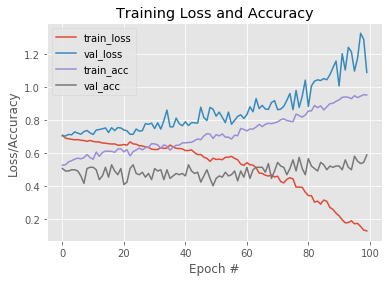

In [80]:
vizModelMetric(evaluateModelAndTestAccuracy(CNN_RNNNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

In [81]:
# Building ML model -combine

In [82]:
getStartEndDateShape(result_ntw)

---------------------------
shape (4423, 1538)
startDate 2004/07/21
endDate 2019/04/04


In [83]:
result_ntw = createComparableDataset(result_ntw)

In [84]:
getStartEndDateShape(result_ntw)

---------------------------
shape (1423, 1538)
startDate 2015-05-04 00:00:00
endDate 2019-03-28 00:00:00


In [85]:
train, train_y,test, test_y = prepareDataSet(result_ntw)
print('train',train.shape,'test',test.shape,'train_y',len(train_y),'test_y',len(test_y))

train (1336, 1536) test (87, 1536) train_y 1336 test_y 87


In [86]:
NaiveBayes(train,train_y,test,test_y)

accuracy_score 0.4827586206896552
classification_score
               precision    recall  f1-score   support

         0.0       0.61      0.42      0.49        53
         1.0       0.39      0.59      0.47        34

   micro avg       0.48      0.48      0.48        87
   macro avg       0.50      0.50      0.48        87
weighted avg       0.53      0.48      0.49        87



In [87]:
NaivePredition(list(test_y))

Model accuracy = 0.756
classification_score
               precision    recall  f1-score   support

         0.0       0.71      0.69      0.70        36
         1.0       0.78      0.80      0.79        50

   micro avg       0.76      0.76      0.76        86
   macro avg       0.75      0.75      0.75        86
weighted avg       0.75      0.76      0.76        86



In [88]:
features = list(train.columns)
cCMatrixAccRF(train , train_y, test,test_y,"")

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
confusion_matrix [[ 2 34]
 [ 0 51]]
number of datapoints in Up Class 51
number of datapoints in Down Class 36
accuracy_score 0.6091954022988506
classification_score
               precision    recall  f1-score   support

         0.0       0.06      1.00      0.11         2
         1.0       1.00      0.60      0.75        85

   micro avg       0.61      0.61      0.61        87
   macro avg       0.53      0.80      0.43        87
weighted avg       0.98      0.61      0.74        87

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [89]:
cCMatrixAccXGB(train , train_y, test,test_y)

C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


Model accuracy = 0.598
classification_score
               precision    recall  f1-score   support

         0.0       0.60      0.08      0.15        36
         1.0       0.60      0.96      0.74        51

   micro avg       0.60      0.60      0.60        87
   macro avg       0.60      0.52      0.44        87
weighted avg       0.60      0.60      0.49        87



In [90]:
# Building DL model -combine
inputFeatures = train.shape[1]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 100)               153700    
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 101       
Total params: 163,901
Trainable params: 163,901
Non-trainable params: 0
_________________________________________________________________
Train on 1202 samples, validate on 134 samples
Epoch 1/100
1202/1202 [==============================] - 2s 1ms/step - loss: 3.4514 - acc

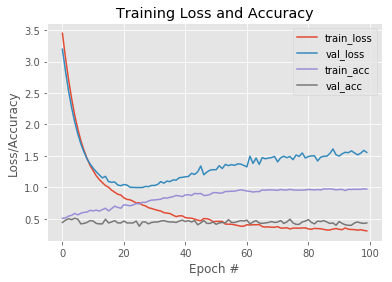

In [91]:
vizModelMetric(evaluateModelAndTestAccuracy(DenseNetwork(inputFeatures),train, train_y, test, test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 1536, 32)          128       
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 768, 32)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 101       
Total params: 53,429
Trainable params: 53,429
Non-trainable params: 0
_________________________________________________________________
Train on 1202 samples, validate on 134 samples
Epoch 1/100
1202/1202 [==============================] - 12s 10ms/step - loss: 0.6911 - acc: 0.5483 - val_loss: 0.6995 - val_acc: 0.4925
Epoch 2/100
1202/1202 [==============================] - 9s 8ms/step - loss: 0.6892 - 

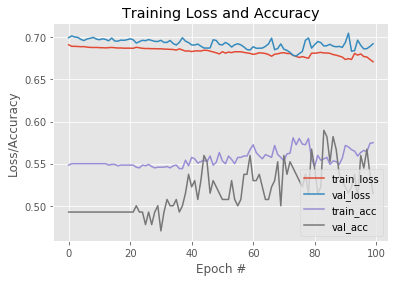

In [92]:
vizModelMetric(evaluateModelAndTestAccuracy(CNN_LSTMNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 1536, 32)          128       
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 768, 32)           0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 200)               106400    
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 201       
Total params: 106,729
Trainable params: 106,729
Non-trainable params: 0
_________________________________________________________________
Train on 1202 samples, validate on 134 samples
Epoch 1/100
1202/1202 [==============================] - 13s 11ms/step - loss: 0.6920 - acc: 0.5208 - val_loss: 0.6995 - val_acc: 0.4925
Epoch 2/100
1202/1202 [==============================] - 10s 9ms/step - loss: 0.6891

1202/1202 [==============================] - 13s 11ms/step - loss: 0.6836 - acc: 0.5507 - val_loss: 0.6914 - val_acc: 0.5075
Epoch 55/100
1202/1202 [==============================] - 13s 11ms/step - loss: 0.6831 - acc: 0.5499 - val_loss: 0.6905 - val_acc: 0.5299
Epoch 56/100
1202/1202 [==============================] - 13s 11ms/step - loss: 0.6826 - acc: 0.5541 - val_loss: 0.6868 - val_acc: 0.5299
Epoch 57/100
1202/1202 [==============================] - 13s 11ms/step - loss: 0.6853 - acc: 0.5491 - val_loss: 0.6874 - val_acc: 0.5522
Epoch 58/100
1202/1202 [==============================] - 13s 11ms/step - loss: 0.6844 - acc: 0.5582 - val_loss: 0.6923 - val_acc: 0.5000
Epoch 59/100
1202/1202 [==============================] - 13s 11ms/step - loss: 0.6837 - acc: 0.5507 - val_loss: 0.6960 - val_acc: 0.5000
Epoch 60/100
1202/1202 [==============================] - 13s 11ms/step - loss: 0.6830 - acc: 0.5532 - val_loss: 0.6965 - val_acc: 0.5075
Epoch 61/100
1202/1202 [=======================

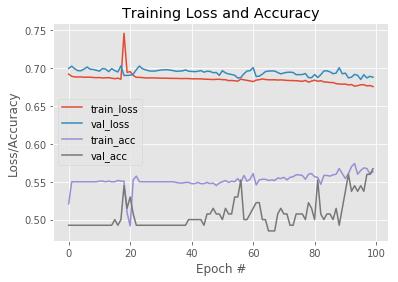

In [93]:
vizModelMetric(evaluateModelAndTestAccuracy(CNN_BideirectionalLSTMNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_11 (Conv1D)           (None, 1536, 32)          128       
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 768, 32)           0         
_________________________________________________________________
gru_3 (GRU)                  (None, 100)               39900     
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 101       
Total params: 40,129
Trainable params: 40,129
Non-trainable params: 0
_________________________________________________________________
Train on 1202 samples, validate on 134 samples
Epoch 1/100
1202/1202 [==============================] - 11s 9ms/step - loss: 0.6929 - acc: 0.5216 - val_loss: 0.6980 - val_acc: 0.4925
Epoch 2/100
1202/1202 [==============================] - 8s 7ms/step - loss: 0.6890 - a

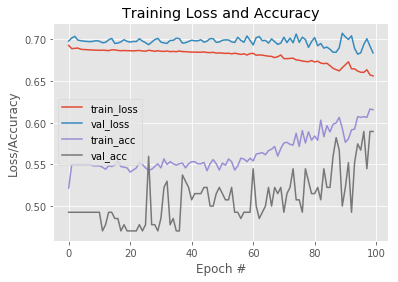

In [94]:
vizModelMetric(evaluateModelAndTestAccuracy(CNN_GRUNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 1536, 32)          128       
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 768, 32)           0         
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 100)               13300     
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 101       
Total params: 13,529
Trainable params: 13,529
Non-trainable params: 0
_________________________________________________________________
Train on 1202 samples, validate on 134 samples
Epoch 1/100
1202/1202 [==============================] - 5s 4ms/step - loss: 0.6930 - acc: 0.5258 - val_loss: 0.7067 - val_acc: 0.4851
Epoch 2/100
1202/1202 [==============================] - 3s 3ms/step - loss: 0.6881 - ac

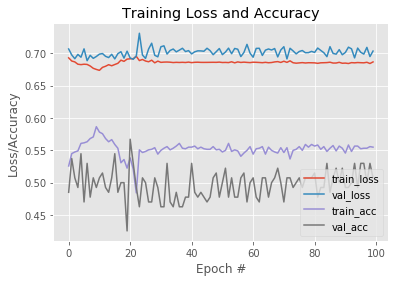

In [95]:
vizModelMetric(evaluateModelAndTestAccuracy(CNN_RNNNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)